# Teoria da Decisão - Trabalho Computacional

**TEMAS: MODELAGEM, OTIMIZAÇÃO MONO E MULTIOBJETIVO, DECISÃO**

**Aluno:**

**1. Pedro Vieira - Matrícula: 201611725**

**2. Frederico Ferri - Matrícula: 2020026931**


# Especificação do Problema

Deseja-se instalar uma rede WLAN do tipo N 2D para atendimento de um centro de convenções com 400 × 400 metros. Para planejamento dessa rede foram estimados 495 pontos de demanda, com suas respectivas posições geográficas e consumos de largura de banda. O arquivo `clientes.csv` contém as informações dos clientes: cada linha representa um cliente; a primeira e a segunda coluna correspondem às coordenadas `x` e `y` do cliente (em metros); a terceira coluna representa o consumo de banda do cliente (em Mbps).

## Neste problema tem-se:

- **Variáveis de decisão**
  - As posições (coordenadas `x` e `y`) dos pontos de acesso (PA) a serem instalados
  - O ponto de acesso que será responsável por atender cada cliente;

- **Restrições**
  - Ao menos 98% dos pontos de demanda devem ter suas demandas integralmente atendidas;
  - Cada ponto de acesso a ser instalado tem capacidade de 54 Mbps, que não pode ser excedida;
  - Um cliente pode ser atendido por um PA se a distância entre ambos é inferior a 85 metros;
  - Assumindo que a exposição de um cliente `c` a um ponto de acesso `p` é dado por:
  $$
  I_{(c, p)} = \lambda \div d_{(c, p)}^\gamma
  $$
  Onde:
    - `λ` é o coeficiente de exposição (sinal nominal do PA),
    - `d(c, p)` é a distância entre `c` e `p`, e
    - `γ` é o fator de decaimento.
    - A somatória da exposição de cada cliente à rede de PAs instalados deve ser pelo menos 5% do sinal nominal do PA.
  - Cada cliente só pode ser atendido por um único PA;
  - Devido a restrições orçamentárias, podem ser instalados no máximo 30 PAs;

- **Simplificações**
  - Os pontos de demanda e seus consumos de banda são estáticos;
  - Os efeitos de obstáculos internos no ambiente são desprezados;
  - Um ponto de acesso não causa interferência em outros;
  - $\lambda$ e $\gamma$ são iguais a 1


# ENTREGA 1: MODELAGEM MATEMÁTICA E OTIMIZAÇÃO MONO-OBJETIVO

## Modelagem

### Parâmetros:
- $ n :$ Número de clientes.
- $ m :$ Número de possíveis locais para instalação de PAs.
- $ c_j :$ Consumo do cliente $( j )$.
- $ q_i :$ Capacidade do PA $( i )$.
- $ r_i :$ Raio de cobertura do PA $( i )$.
- $ d_{ij} :$ Distância Euclidiana entre o PA $( i )$ e o cliente $( j )$.
- $ \lambda :$ Coeficiente de exposição, relacionado à intensidade do sinal.
- $ \gamma :$ Fator de decaimento, que provavelmente modela a atenuação do sinal com a distância.
- $ I_{ij} :$ Exposição do cliente $(j)$ ao PA $(i)$.
- $ n_{max} :$ Quantidade máxima de PAs disponiveis.


### Variáveis

$$
x_{ij} = \begin{cases}
1, & \text{se o cliente } j \text{ é atendido pelo PA } i \\
0, & \text{caso contrário}
\end{cases}
$$


$$
y_i = \begin{cases}
1, & \text{se o PA } i \text{ está ativo} \\
0, & \text{caso contrário}
\end{cases}
$$


### Funções Objetivo:
1. Minimizar a quantidade de PAs ativos ($ f_1 $):
   $$
   \text{Minimize} \sum_{i=1}^{m} y_i
   $$

2. Minimizar a soma total das distâncias entre os PAs ativos e clientes atendidos $( f_2 )$:
   $$
   \text{Minimize} \sum_{i=1}^{m} \sum_{j=1}^{n} d_{ij} \times x_{ij}
   $$



### Restrições:
1. Garantir que o percentual mínimo de clientes seja atendido ($ R1 $):
   $$
   \sum_{i=1}^{m} y_i \geq 0,98 \times n
   $$

2. Garantir que a capacidade dos PAs ativos não seja violada ($ R2 $):
   $$
   \sum_{j=1}^{n} c_j \times x_{ij} \leq q_i \times y_i, \quad \forall i
   $$

3. Garantir que PAs ativos só atendam clientes que estejam dentro do seu raio de cobertura ($ R3 $):
   $$
   \sum_{j=1}^{n} d_{ij} \times x_{ij} \leq r_i \times y_i, \quad \forall i
   $$

4. Garantir que exposição acumulada de cada cliente à rede de PAs ativos seja no mínimo 5% do coeficiente de exposição ($ R4 $):
   $$
   \sum_{i=1}^{m} I_{ij} \times y_i \geq 0.05 \times \lambda, \quad \forall j
   $$

5. Garantir que cada cliente \( j \) seja atribuído a no máximo um PA ($ R5 $):
   $$
   \sum_{i=1}^{m} x_{ij} \leq 1, \quad \forall j
   $$

6. Garantir que o número máximo de PAs ativos não seja violado ($ R6 $):
   $$
   \sum_{i=1}^{m} y_i \leq n_{\text{max}}
   $$

7. Definir o domínio das variáveis de otimização do problema ($R7 $) e ($ R8 $):
   $$
   x_{ij}, y_i \in \{0,1\}
   $$

8. Garantir que os pontos de acesso podem ser alocados somente em coordenadas pré-fixadas, definidas sobre um grid com precisão de 5m $(R9)$. Seja $( x_i )$ e $( y_i )$ as coordenadas `x` e `y` do ponto de acesso $(i)$, respectivamente:
  $$
  x_i \text{ mod } 5 = 0 \quad \text{ e } \quad y_i \text{ mod } 5 = 0
  $$

## Solucionando o problema

### Meta-heurística

Para resolver o problema em questão, empregamos o algoritmo de penalização. Isso nos permite avaliar as soluções com base em um valor de fitness e penalização, conforme está definido na função de penalização (penalty_method(solution, constraints)) e nas restrições do problema.

### Estrutura da Solução
A solução do projeto está definida a partir dos seguintes parâmetros:

- x: Variáveis de decisão para atribuição de clientes a PAs

- y: Variáveis de decisão para ativação de PAs

- client_coordinates: Armazena as posições (x,y) de cada cliente

- client_pa_distances: Armazena a distancia entre cliente e PA

- client_bandwidth: Armazena a largura de banda necessária de cada cliente

- penalty: Armazena a penalidade da solução

- fitness: Armazena o ajuste da solução

- penalty_fitness: Armazena o ajuste somado a penalidade da solução

Tais parâmetros nos dão uma dimensão completa de todos os dados da solução relevantes para avaliação, de modo que esta possa ser submetida tanto às funções objetivo quanto às funções de restrição. 


### Vizinhança

Foram utilizadas três estruturas de vizinhança usadas para melhorar a segurança de uma solução ótima para o problema. São elas:

- Troca de Clientes entre PAs (Swap): Nesta estrutura de vizinhança, são exploradas diferentes combinações de clientes atribuídos a diferentes pontos de acesso (PAs). Na implementação, na prática, troca-se um cliente de um PA por outro cliente de outro PA e é avaliado se essa troca leva a uma solução melhor.

- Adição ou Remoção de PAs: Nesta estrutura de vizinhança, são adicionados ou removidos pontos de acesso (PAs) da solução atual. Na implementação, é avaliado a adição de um novo PA em uma posição estratégica ou a remoção de um PA existente que pode não ser necessário.

- Movimento dos PAs (Shift): Nesta estrutura de vizinhança, são exploradas diferentes posições para os pontos de acesso (PAs) existentes. Na implementação, um PA é movido para uma posição adjacente e é avaliada a melhoria ou não da qualidade da solução.

### Solução Inicial - qual heuristica construtiva usar para já otimizar o problema?
A heurística construtiva do projeto foi desenvolvida seguindo as seguintes etapas:

- Seleção das Posições dos PAs: É selecionado aleatoriamente um conjunto inicial de posições para os pontos de acesso (PAs).

- Atribuição dos Clientes aos PAs mais Próximos: Cada cliente é atribuído ao PA mais próximo, levando em consideração as posições escolhidas na etapa anterior. Isso foi feito calculando as distâncias euclidianas entre cada cliente e cada PA e escolhendo o PA mais próximo para cada cliente.

- Ativação dos PAs: Após atribuir todos os clientes aos PAs mais próximos, é escolhido um número máximo de PAs para garantir que a cobertura da rede seja adequada.

Tal heurística construtiva pode ser utilizada para gerar soluções iniciais para ambas as funções.

### Refinamento

## Resultados

### Implementação do Algoritimo de Otimização




In [1]:
import numpy as np

# Defina os parâmetros do problema
num_clients = 495
num_pa_locations = 30
# Outros parâmetros...

def initial_solution(clients_data, solution):

    # Extrai as coordenadas dos clientes do array
    client_coordinates = clients_data[:, :2]
    solution['client_coordinates'] = client_coordinates

    # Extrai a largura de banda dos clientes do array
    solution['client_bandwidth'] = clients_data[:, 2]

    # Gerar coordenadas para os PAs com resolução de 5 metros
    pa_coordinates = np.random.randint(0, 80, size=(num_pa_locations, 2)) * 5  # 80 é o tamanho do grid em metros
    solution['pa_coordinates'] = pa_coordinates

    # Atribuir cada cliente ao PA mais próximo e ativar o PA
    for j in range(num_clients):
      client_x, client_y = client_coordinates[j]
      distances_to_pas = np.sqrt(np.sum((pa_coordinates - [client_x, client_y])**2, axis=1))
      closest_pa_index = np.argmin(distances_to_pas)
      solution['x'][closest_pa_index, j] = 1

    # Ativa aleatoriamente um número máximo de PAs
    num_active_pas = np.random.randint(1, num_pa_locations + 1)
    active_pas_indices = np.random.choice(num_pa_locations, num_active_pas, replace=False)
    solution['y'][active_pas_indices] = 1

    # Calcula a distancia entre cada cliente e cada PA ativo
    for i in range(num_pa_locations):
      pa_x, pa_y = pa_coordinates[i]
      for j in range(num_clients):
        client_x, client_y = client_coordinates[j]
        distance = np.sqrt((pa_x - client_x) ** 2 + (pa_y - client_y) ** 2)
        solution['client_pa_distances'][i, j] = distance


    return solution

# Função para gerar uma solução viável
def generate_solution(clients_data, constructor_heuristic=True):
    # Inicialize as variáveis de decisão
    solution = {
        'x': np.zeros((num_pa_locations, num_clients)),  # Variáveis de decisão para atribuição de clientes a PAs
        'y': np.zeros(num_pa_locations),  # Variáveis de decisão para ativação de PAs
        'client_coordinates': np.zeros((num_clients, num_clients)),  # Armazena as posições (x,y) de cada cliente
        'client_pa_distances': np.zeros((num_pa_locations, num_clients)),  # Armazena a distancia entre cliente e PA
        'client_bandwidth': np.zeros(num_clients), # Armazena a largura de banda necessária de cada cliente
        'penalty': np.zeros(0), # Armazena a penalidade da solução
        'fitness': np.zeros(0), # Armazena o ajuste da solução
        'penalty_fitness': np.zeros(0) # Armazena o ajuste somado a penalidade da solução
    }

    if constructor_heuristic:
      return initial_solution(clients_data, solution)

    # Extrai as coordenadas dos clientes do array
    client_coordinates = clients_data[:, :2]
    solution['client_coordinates'] = client_coordinates

    # Extrai a largura de banda dos clientes do array
    solution['client_bandwidth'] = clients_data[:, 2]

    # Gerar coordenadas aleatorias para os PAs com resolução de 5 metros
    pa_coordinates = np.random.randint(0, 80, size=(num_pa_locations, 2)) * 5  # 80 é o tamanho do grid
    solution['pa_coordinates'] = pa_coordinates

    # Atribui cada cliente a um PA aleatoriamente e deixa ativo
    for j in range(num_clients):
        i = np.random.randint(num_pa_locations)  # Seleciona um PA aleatório
        solution['x'][i, j] = 1  # Atribui o cliente j ao PA i

    # Ativa aleatoriamente um número máximo de PAs
    num_active_pas = np.random.randint(1, num_pa_locations + 1)
    active_pas_indices = np.random.choice(num_pa_locations, num_active_pas, replace=False)
    solution['y'][active_pas_indices] = 1

    # Calcula a distancia entre cada cliente e cada PA ativo
    for i in range(num_pa_locations):
      pa_x, pa_y = pa_coordinates[i]
      for j in range(num_clients):
        client_x, client_y = client_coordinates[j]
        distance = np.sqrt((pa_x - client_x) ** 2 + (pa_y - client_y) ** 2)
        solution['client_pa_distances'][i, j] = distance

    return solution

# Restrições
def constraint_min_clients_served(solution):
    # Restrição R1: Garantir que o percentual mínimo de clientes seja atendido
    return np.sum(solution['y']) >= 0.98 * num_clients

def constraint_capacity(solution):
    # Restrição R2: Garantir que a capacidade dos PAs ativos não seja violada
    for i in range(num_pa_locations):
        if np.sum(solution['x'][i] * solution['client_bandwidth']) > pa_capacity:
            return False
    return True

def constraint_coverage(solution):
    # Restrição R3: Garantir que PAs ativos só atendam clientes que estejam dentro do seu raio de cobertura
    for i in range(num_pa_locations):
        if np.sum(solution['x'][i] * solution['client_pa_distances']) > pa_coverage:
            return False
    return True

def constraint_exposure(solution):
    # Restrição R4: Garantir que exposição acumulada de cada cliente à rede de PAs ativos seja no mínimo 5% do coeficiente de exposição
    for j in range(num_clients):
        if np.sum(pa_exposure * solution['y'] / solution['client_pa_distances'][:, j]) < 0.05 * exposure_coefficient:
            return False
    return True

def constraint_unique_assignment(solution):
    # Restrição R5: Garantir que cada cliente seja atribuído a no máximo um PA
    return np.all(np.sum(solution['x'], axis=0) <= 1)

def constraint_max_pas(solution):
    # Restrição R6: Garantir que o número máximo de PAs ativos não seja violado
    return np.sum(solution['y']) <= num_pa_locations

def constraint_binary_variables(solution):
    # Restrições R7 e R8: Definir o domínio das variáveis de otimização do problema
    return np.all(np.logical_or(solution['x'] == 0, solution['x'] == 1)) and np.all(np.logical_or(solution['y'] == 0, solution['y'] == 1))

def constraint_pa_coordinates(solution):
    # Restrição R9: Garantir que as coordenadas dos pontos de acesso sejam múltiplos de 5
    pa_coordinates = solution['pa_coordinates']
    return np.all(pa_coordinates % 5 == 0)

# Função objetivo 1: Minimizar a quantidade de PAs ativos
def objective_function_1(solution, constraints):

    # Calculo da função objetivo
    solution['fitness'] = np.sum(solution['y'])

    # Calculo das penalidades
    solution['penalty'] = penalty_method(solution, constraints)

    # Aplicação das penalidades
    solution['penalty_fitness'] = solution['penalty'] + solution['fitness']

    return solution

# Função objetivo 2: Minimizar a soma total das distâncias entre os PAs ativos e clientes atendidos
def objective_function_2(solution, constraints):

    # Calculo da função objetivo
    solution['fitness'] = np.sum(np.multiply(solution['client_pa_distances'], solution['x']))

    # Calculo das penalidades
    solution['penalty'] = penalty_method(solution, constraints)

    # Aplicação das penalidades
    solution['penalty_fitness'] = solution['penalty'] + solution['fitness']

    return solution

# Carrega os dados dos clientes do arquivo CSV
def get_clients():
  clients = np.genfromtxt('clientes.csv', delimiter=',')
  return clients

# Estruturas de Vizinhança
def swap_clients_between_pas(solution):
    # Troca de Clientes entre PAs (Swap)
    new_solution = solution.copy()  # Criar uma cópia da solução atual

    # Selecionar aleatoriamente dois PAs diferentes
    pa_indices = np.random.choice(np.arange(num_pa_locations), size=2, replace=False)
    pa1_index, pa2_index = pa_indices

    # Selecionar aleatoriamente um cliente atribuído ao PA1 e outro ao PA2
    client_indices_pa1 = np.where(solution['x'][pa1_index] == 1)[0]
    client_indices_pa2 = np.where(solution['x'][pa2_index] == 1)[0]

    if len(client_indices_pa1) > 0 and len(client_indices_pa2) > 0:
        client_index_pa1 = np.random.choice(client_indices_pa1)
        client_index_pa2 = np.random.choice(client_indices_pa2)

        # Realizar a troca dos clientes entre os PAs
        new_solution['x'][pa1_index, client_index_pa1] = 0
        new_solution['x'][pa2_index, client_index_pa2] = 0
        new_solution['x'][pa1_index, client_index_pa2] = 1
        new_solution['x'][pa2_index, client_index_pa1] = 1

    return new_solution

def add_or_remove_pas(solution):
    # Adição ou Remoção de PAs
    new_solution = solution.copy()  # Criar uma cópia da solução atual

    # Selecionar aleatoriamente um número de PAs a adicionar ou remover
    num_pas_to_add_or_remove = np.random.randint(1, num_pa_locations + 1)

    # Selecionar aleatoriamente quais PAs adicionar ou remover
    pa_indices = np.random.choice(np.arange(num_pa_locations), size=num_pas_to_add_or_remove, replace=False)

    # Ativar ou desativar os PAs selecionados
    for pa_index in pa_indices:
        new_solution['y'][pa_index] = 1 - new_solution['y'][pa_index]

    return new_solution

def shift_pa_positions(solution):
    # Movimento dos PAs (Shift)
    new_solution = solution.copy()  # Criar uma cópia da solução atual

    # Gerar uma nova posição para cada PA
    new_pa_coordinates = np.random.randint(0, 80, size=(num_pa_locations, 2)) * 5  # 80 é o tamanho do grid em metros

    # Atualizar as coordenadas dos PAs na solução
    new_solution['pa_coordinates'] = new_pa_coordinates

    # Recalcular as distâncias entre os clientes e os PAs com as novas posições
    for i in range(num_pa_locations):
        pa_x, pa_y = new_pa_coordinates[i]
        for j in range(num_clients):
            client_x, client_y = solution['client_coordinates'][j]
            distance = np.sqrt((pa_x - client_x) ** 2 + (pa_y - client_y) ** 2)
            new_solution['client_pa_distances'][i, j] = distance

    return new_solution

def neighborhood_change(new_solution, solution, neighborhood):

    # Atualizar a melhor solução encontrada e altera a vizinhança se necessário
    if new_solution['penalty_fitness'] < solution['penalty_fitness']:
        solution = new_solution.copy()
        neighborhood  = 1
    else:
        neighborhood += 1

    return solution, neighborhood

def shake(solution, neighborhood):

  match neighborhood:
    case 1:
      return swap_clients_between_pas(solution)
    case 2:
      return add_or_remove_pas(solution)
    case 3:
      return shift_pa_positions(solution)


# Algoritmo para otimizar cada função objetivo individualmente
def rvns_method(objective_function, constraints, construct_heuristc=False, max_iter=100, neighborhood_max = 4):

    # Atribui os dados dos clientes
    clients_data = get_clients()

    # Gerar uma solução aleatória viável
    solution = generate_solution(clients_data)
    solution = objective_function(solution, constraints)

    for _ in range(max_iter):

      neighborhood = 1

      while neighborhood <= neighborhood_max:

        # Gerar uma pertubação para comparação com a vizinhança e busca local
        new_solution = shake(solution, neighborhood)

        # Avaliar a solução
        new_solution = objective_function(solution, constraints)

        # Compara a solução nova com a atual com as soluções da vizinhança
        solution, neighborhood = neighborhood_change(new_solution, solution, neighborhood)

    return solution

def penalty_method(solution, constraints):

  # Aplicar as penalidades para as violações de restrições
  penalty = 0
  for constraint in constraints:
      if not constraint(solution):
          penalty += 1

  return penalty

# Parâmetros específicos do problema
pa_capacity = 54  # Capacidade de cada PA
pa_coverage = 85  # Raio de cobertura de cada PA
pa_exposure = 1  # Exposição nominal do PA
exposure_coefficient = 1  # Coeficiente de exposição

constrains = [constraint_min_clients_served, constraint_capacity, constraint_coverage, constraint_exposure, constraint_unique_assignment, constraint_max_pas, constraint_binary_variables, constraint_pa_coordinates]


### Resultados da função objetivo $f_1$

In [2]:
# Chamar o algoritmo de Penalidade para otimizar cada função objetivo individualmente
# Para a função objetivo 1
result = []
for _ in range(5):
  best_solution = rvns_method(objective_function_1, constrains)

  result.append(best_solution['penalty_fitness'])

print('\n--- MELHOR SOLUÇÃO de f1 ENCONTRADA ---\n')
print('O valor MIN encontrado foi:', np.min(result))
print('O valor STD encontrado foi:', np.std(result))
print('O valor MAX encontrado foi:', np.max(result))

print(result)





--- MELHOR SOLUÇÃO de f1 ENCONTRADA ---

O valor MIN encontrado foi: 14.0
O valor STD encontrado foi: 2.154065922853802
O valor MAX encontrado foi: 20.0
[14.0, 16.0, 19.0, 18.0, 20.0]


In [3]:
# Para a função objetivo 2
best_solution_f2= rvns_method(objective_function_2, constrains)

# Imprimir ou retornar as melhores soluções encontradas
#print("Melhor solução para a função objetivo 1:", score_f1)
#print("Melhor solução para a função objetivo 2:", score_f2)


# Imprimir ou retornar as melhores soluções encontradas
print("Melhor solução para a função objetivo 1:", best_solution['x'])
print("Melhor solução para a função objetivo 2:", best_solution_f2['x'])


Melhor solução para a função objetivo 1: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
Melhor solução para a função objetivo 2: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


[(206, 15, 136), (213, 34, 167), (208, 213, 130), (249, 33, 173), (212, 223, 61), (180, 5, 161), (189, 2, 211), (201, 205, 27), (187, 174, 214), (182, 24, 25), (194, 103, 149), (246, 49, 40), (206, 186, 118), (182, 196, 69), (210, 59, 11), (252, 159, 111), (228, 92, 67), (220, 192, 28), (189, 45, 194), (231, 178, 185), (205, 223, 213), (208, 107, 49), (185, 2, 125), (197, 195, 200), (218, 232, 187), (188, 55, 7), (231, 240, 220), (239, 224, 19), (254, 106, 72), (206, 39, 45)]


C:\Users\sangu\AppData\Local\Temp\ipykernel_6880\1545828363.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pa_coordinates[:, 0], pa_coordinates[:, 1], marker='s', c=cores_acesso[i], label='Pontos de Acesso')


ValueError: 'c' argument has 3 elements, which is inconsistent with 'x' and 'y' with size 30.

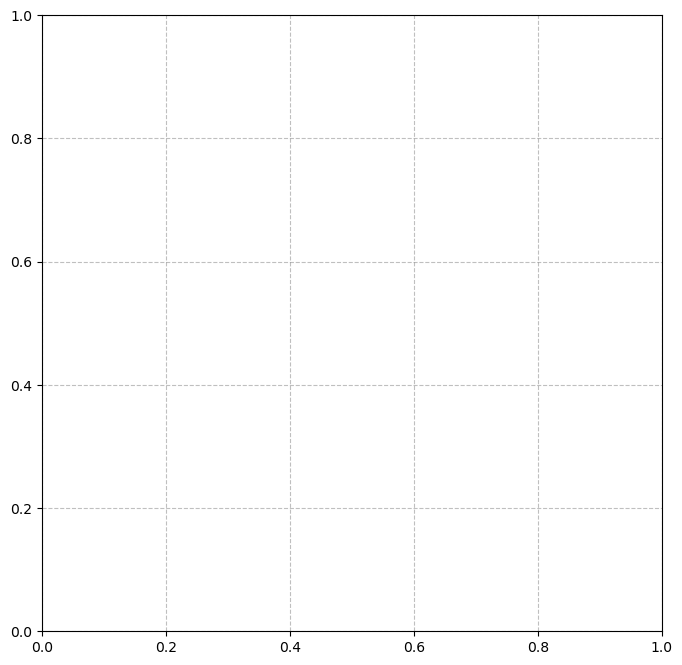

In [4]:
#Graficos para visualização das soluções
import matplotlib.pyplot as plt
import random

def cor_vibrante():
    # Gerar valores RGB mais vibrantes
    r = random.randint(180, 255)  # Valor de vermelho entre 180 e 255
    g = random.randint(0, 255)    # Valor de verde entre 0 e 255
    b = random.randint(0, 255)    # Valor de azul entre 0 e 255
    return (r, g, b)

#Função para plotar os PAs e os clientes em um grid
def plot_solution(solution, client_coordinates):
    # Criar uma nova figura
    plt.figure(figsize=(8, 8))

    # Plotar o grid
    plt.grid(True, linestyle='--', color='gray', alpha=0.5)



    # Definindo as cores RGB para os 30 pontos de acesso
    cores_acesso = [cor_vibrante() for _ in range(30)]
    print(cores_acesso)
    # Plotar os PAs
    pa_coordinates = solution['pa_coordinates']
    for i in range(num_pa_locations):
      plt.scatter(pa_coordinates[:, 0], pa_coordinates[:, 1], marker='s', color=cores_acesso[i], label='Pontos de Acesso')

      # Plotar os clientes
      for j in range(num_clients):
        plt.scatter(client_coordinates[:, 0], client_coordinates[:, 1], marker='o', color=cores_acesso[i], label='Clientes')

    # Adicionar legendas e título
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Pontos de Acesso e Clientes')
    #plt.legend()

    # Mostrar o gráfico
    plt.show()

#Carrega os dados dos clientes do arquivo CSV
clients_data = get_clients()

#Extrai as coordenadas dos clientes do array
client_coordinates = clients_data[:, :2]

#Plotar a solução da função objetivo 1
plot_solution(best_solution, client_coordinates)

#Plotar a solução da função objetivo 2
#plot_solution(best_solution_f2, client_coordinates)

### Resultados da função objetivo $f_2$

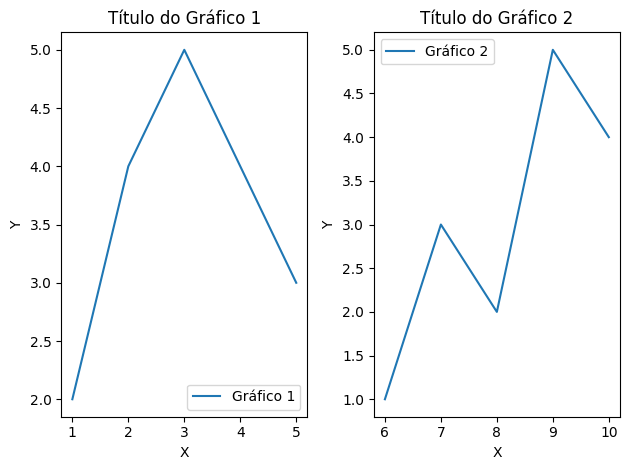

In [ ]:
import matplotlib.pyplot as plt

# Gere dados para dois gráficos
x1 = [1, 2, 3, 4, 5]
y1 = [2, 4, 5, 4, 3]

x2 = [6, 7, 8, 9, 10]
y2 = [1, 3, 2, 5, 4]

# Crie um layout de 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2)

# Plota o gráfico 1 no subplot 1
ax1 = axes[0]  # Acesse o subplot 1 usando o índice
ax1.plot(x1, y1, label='Gráfico 1')
ax1.set_title('Título do Gráfico 1')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.legend()

# Plota o gráfico 2 no subplot 2
ax2 = axes[1]  # Acesse o subplot 2 usando o índice
ax2.plot(x2, y2, label='Gráfico 2')
ax2.set_title('Título do Gráfico 2')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()
